In [1]:
import xml.etree.ElementTree

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

In [3]:
# fp = 'scanner_data/12_02_2025/data_12_02_2025_11_08_02.csv'
fp = 'test/test_data/dummy/data_29_04_2025_18_57_54.csv'

def interpolate(group, dim):
    num_rows = len(group)
    group[dim] = np.linspace(group[f'origin_{dim}'].iloc[0], group[f'dest_{dim}'].iloc[0], num_rows)
    return round(group, 4)


def plot_x_y_distance_mm(fp, show_distance = False):
    df = pd.read_csv(fp)
    # Assign a unique group identifier for each origin-destination pair
    for dim in ['x', 'y', 'z']:
        df[f'group_{dim}'] = (df[f'origin_{dim}'] != df[f'origin_{dim}'].shift()).cumsum()
        
        # Apply interpolation to each group
        df = df.groupby(f'group_{dim}', group_keys=False).apply(lambda r: interpolate(r, dim), include_groups=False)
        
        palette = 'viridis'

    if show_distance:
        sns.scatterplot(data=df, x='x', y='y', palette=palette, hue = 'distance_mm')
    else:
        sns.scatterplot(data=df, x='x', y='y', palette=palette)
    
    plt.title(fp.split('/')[-1])
    plt.show()
    

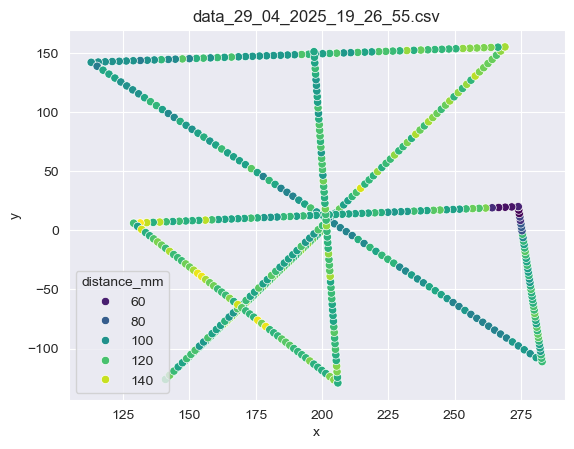

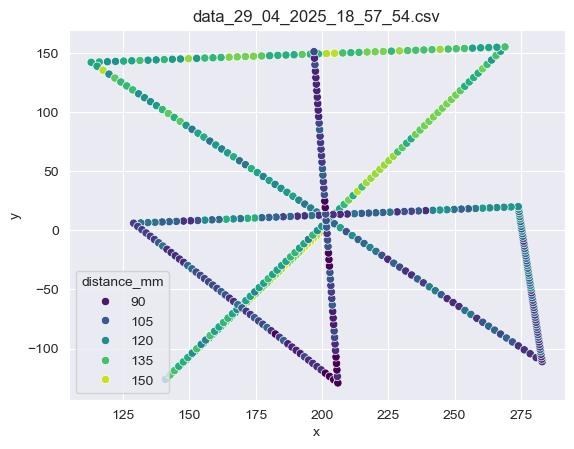

In [6]:
# data_dir = "scanner_data"
data_dir = "test/test_data"
for p in Path(data_dir).iterdir():
    if p.is_dir():
        for f in p.iterdir():
            if f.is_file() and str(f).endswith('.csv'):
                plot_x_y_distance_mm(str(f), show_distance=True)